In [1]:
#importing necesarry library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#reading the file
url = "http://bit.ly/w-data"   #url for dataset of the given problem
df = pd.read_csv(url)    #reading csv file

In [3]:
df.head()  #showing value of top 5 rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
print(df.shape) #know the no. of rows and columns present

(25, 2)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.isna().sum()   #is there any missing value

Hours     0
Scores    0
dtype: int64

In [9]:
x = df.iloc[:,:-1].values    #independent variable

In [10]:
y = df.iloc[:,1].values    #dependent variable

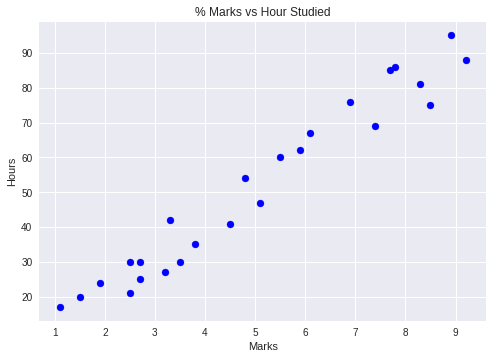

In [11]:
#ploting the graph
plt.style.use("seaborn")
plt.scatter(x,y,color = "Blue")
plt.title("% Marks vs Hour Studied")
plt.xlabel('Marks')
plt.ylabel('Hours')
plt.show()

In [12]:
#Splitting the data in training and testing
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [13]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(normalize=True)
lm.fit(x_train,y_train)  #fitting the model


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [14]:
#predicting the value
y_preds = lm.predict(x_test)
print(y_preds)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [19]:
# Plotting the regression line
coefficient = lm.coef_
intercept  = lm.intercept_

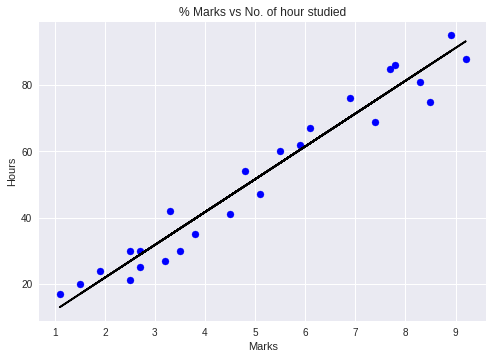

In [21]:
# Formula of line is y = m*x + c
line = coefficient*x + intercept

plt.style.use("seaborn")
plt.plot(x,line,color = 'black')
plt.scatter(x,y,color = "blue")
plt.title("% Marks vs No. of hour studied")
plt.xlabel('Marks')
plt.ylabel('Hours')
plt.show()

In [26]:
result = pd.DataFrame({"Actual Data": y_test,
                     "Predicted Data": y_preds})
print(result)

   Actual Data  Predicted Data
0           20       16.884145
1           27       33.732261
2           69       75.357018
3           30       26.794801
4           62       60.491033


In [23]:
input_pred = lm.predict([[9.25]])
print(f"Predicted score for 9.25 hour of study is : {round(input_pred[0],2)}")

Predicted score for 9.25 hour of study is : 93.69


In [24]:
from sklearn import metrics  
error = metrics.mean_absolute_error(y_test, y_preds)
print(f'Mean Absolute Error: {error}')

Mean Absolute Error: 4.183859899002982


In [25]:
#we can added more feature like "syllabus complete after studying that no of hour" to make our model more efficient